In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import model_selection, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Классификация

Для классификации будет использоваться датасет digits из sklearn.datasets

Разделим выборку на тренировочную и тестовую

In [8]:
dig = datasets.load_digits()
data = dig.data
target = dig.target

X_train, X_test, y_train, y_test = map(pd.DataFrame, train_test_split(data,target,test_size=0.25,shuffle = False))

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Пример, как выглядят цифры

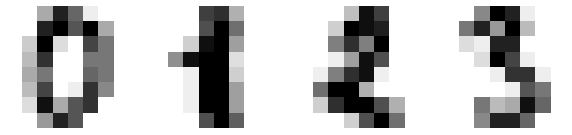

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, dig.images, dig.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

Будем использовать две модели - SVM и KNN, и сравним из результат

In [7]:
knn = KNeighborsClassifier()
svm = SVC()

print(knn.get_params().keys(),'\n')
print(svm.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']) 

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


Подберем наилучшие параметры с помощью кросс валидации

In [10]:
param_grid_knn = {'n_neighbors' : [1,2,3,5,7],}
param_grid_svm = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                  'C' : [0.5, 1, 1.5, 2]}

In [13]:
grid_cv_knn = model_selection.GridSearchCV(knn, param_grid_knn, scoring = 'neg_mean_absolute_error', cv = 4)
grid_cv_svm = model_selection.GridSearchCV(svm, param_grid_svm, scoring = 'neg_mean_absolute_error', cv = 4)

In [16]:
grid_cv_knn.fit(X_train, y_train)
grid_cv_svm.fit(X_train, y_train)

print(grid_cv_knn.best_params_)
print(grid_cv_svm.best_params_,'\n')

print('Точность модели KNN - {}'.format(accuracy_score(grid_cv_knn.best_estimator_.predict(X_test), y_test)))
print('Точность модели SVM - {}'.format(accuracy_score(grid_cv_svm.best_estimator_.predict(X_test), y_test)))

{'n_neighbors': 2}
{'C': 0.5, 'kernel': 'poly'} 

Точность модели KNN - 0.9622222222222222
Точность модели SVM - 0.9533333333333334


Видим, что у модели KNN результат немного лучше, чем у SVM